# Env

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.shape

(10886, 12)

# datetime 조작하기

In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [7]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [8]:
# 연, 월, 일, 시, 분, 초 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [9]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [10]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


<AxesSubplot:xlabel='count', ylabel='second'>

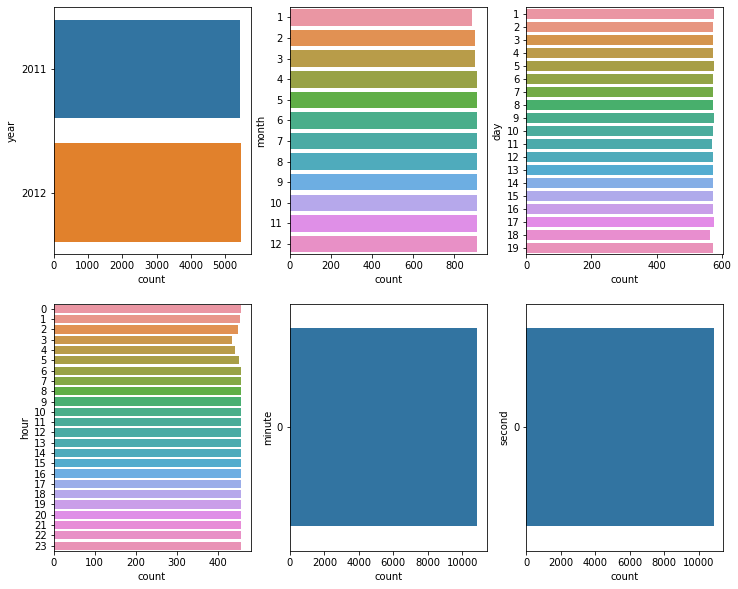

In [11]:
fig, axes = plt.subplots(2, 3, figsize = (12, 10))

sns.countplot(y = train['year'], ax = axes[0][0])
sns.countplot(y = train['month'], ax = axes[0][1])
sns.countplot(y = train['day'], ax = axes[0][2])
sns.countplot(y = train['hour'], ax = axes[1][0])
sns.countplot(y = train['minute'], ax = axes[1][1])
sns.countplot(y = train['second'], ax = axes[1][2])

- 굉장히 비효율적으로 보이네요...

<AxesSubplot:>

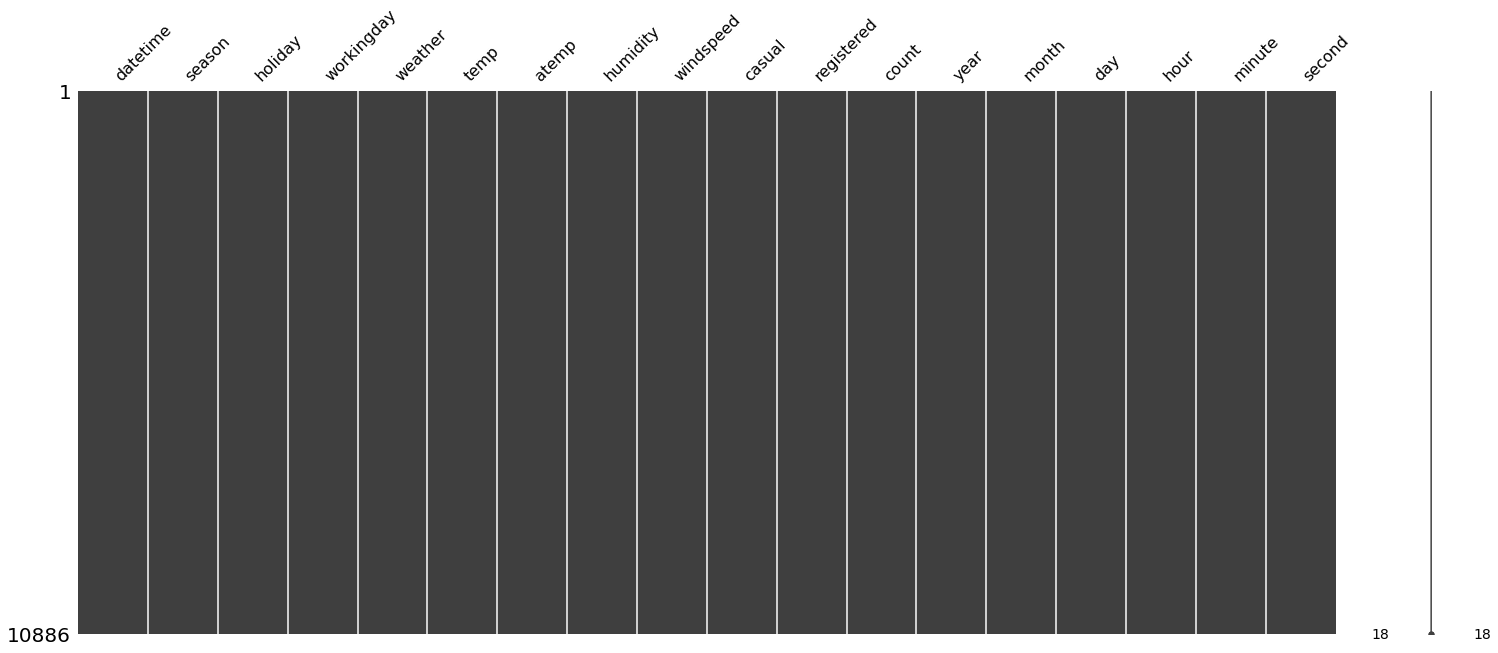

In [12]:
# 결측치는 없음
ms.matrix(train)

In [13]:
train['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

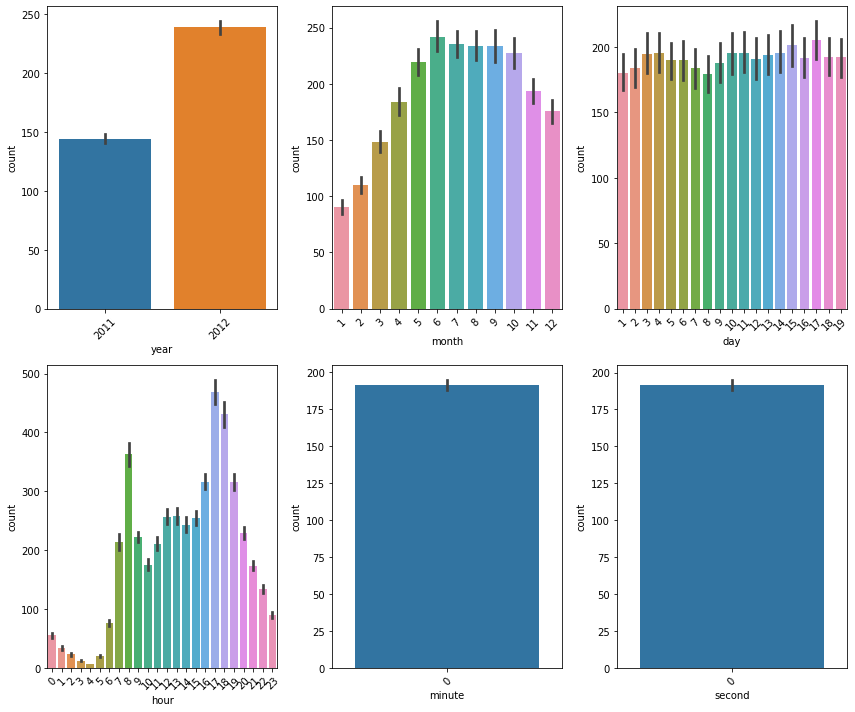

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (12, 10))

# 연도별 대여량 체크
sns.barplot(data=train, x='year', y='count', ax=axes[0][0])
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45)

# 월별 대여량 체크
sns.barplot(data=train, x='month', y='count', ax=axes[0][1])
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45)

# 날별 대여량 체크
sns.barplot(data=train, x='day', y='count', ax=axes[0][2])
axes[0][2].set_xticklabels(axes[0][2].get_xticklabels(), rotation=45)

# 시간별 대여량 체크
sns.barplot(data=train, x='hour', y='count', ax=axes[1][0])
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45)

# 분별 대여량 체크
sns.barplot(data=train, x='minute', y='count', ax=axes[1][1])
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45)

# 초별 대여량 체크
sns.barplot(data=train, x='second', y='count', ax=axes[1][2])
axes[1][2].set_xticklabels(axes[1][2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

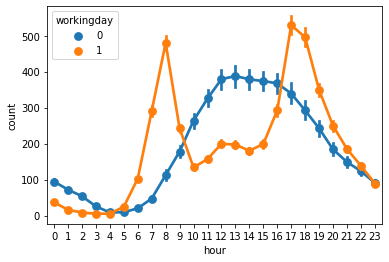

In [15]:
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

# 0 : 주말
# 1 : 평일

<AxesSubplot:xlabel='hour', ylabel='count'>

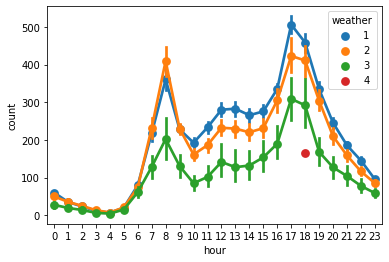

In [16]:
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

# 1 : 맑음
# 2 : 구름
# 3 : 흐림
# 4 : 폭우

<AxesSubplot:xlabel='humidity', ylabel='count'>

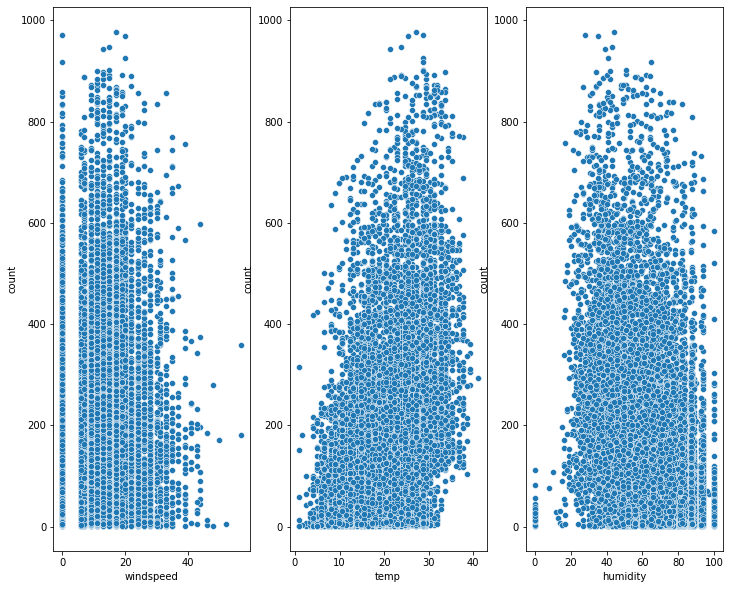

In [17]:
fig, axes = plt.subplots(ncols = 3, figsize = (12, 10))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = axes[0])
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = axes[1])
sns.scatterplot(data = train, x = 'humidity', y = 'count', ax = axes[2])

In [18]:
# 풍속 0 인 거 확인
len(train[train['windspeed'] == 0])

1313

<AxesSubplot:xlabel='count'>

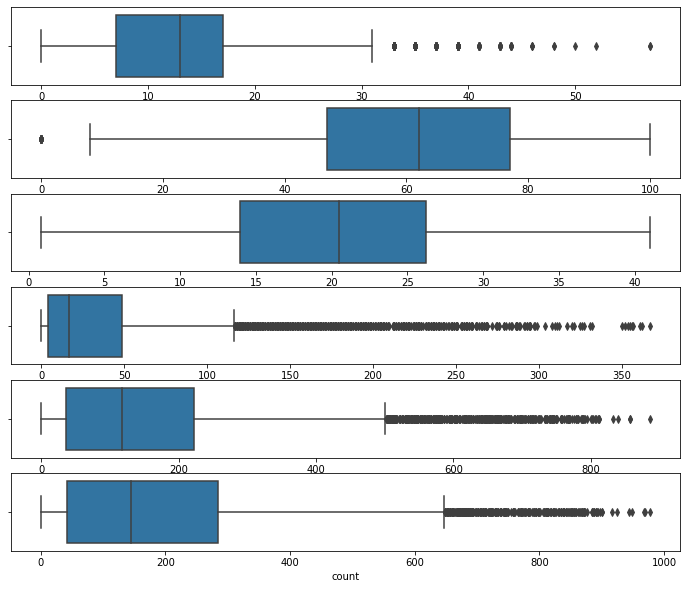

In [19]:
fig, axes = plt.subplots(nrows = 6, figsize = (12, 10))

sns.boxplot(data = train, x = 'windspeed', ax = axes[0])
sns.boxplot(data = train, x = 'humidity', ax = axes[1])
sns.boxplot(data = train, x = 'temp', ax = axes[2])
sns.boxplot(data = train, x = 'casual', ax = axes[3])
sns.boxplot(data = train, x = 'registered', ax = axes[4])
sns.boxplot(data = train, x = 'count', ax = axes[5])

In [20]:
def remove_outliers(df, col):
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 제외한 데이터프레임 반환
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_cleaned

In [21]:
cols_to_check = ['windspeed', 'humidity', 'temp', 'casual', 'registered', 'count']

In [22]:
train_cleaned = train.copy()

for col in cols_to_check:
    train_cleaned = remove_outliers(train_cleaned, col)

In [23]:
train_cleaned.shape

(9364, 18)

In [24]:
# 풍속 0 대체
def windspeed_pred(data):
    wind_0 = data.loc[data['windspeed'] == 0]
    wind_0not = data.loc[data['windspeed'] != 0].copy()  

    col = ['season', 'weather', 'temp', 'atemp', 'humidity', 'day']

    wind_0not['windspeed'] = wind_0not['windspeed'].astype('str')

    rf = RandomForestClassifier()
    rf.fit(wind_0not[col], wind_0not['windspeed'])

    pred_wind0 = rf.predict(wind_0[col])
    wind_0['windspeed'] = pred_wind0
    
    data = pd.concat([wind_0not, wind_0], ignore_index=True)
    data['windspeed'] = data['windspeed'].astype('float') 
    
    data.reset_index(drop=True, inplace=True)
    
    return data

In [25]:
train = windspeed_pred(train_cleaned)

/tmp/ipykernel_48/1554049940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0['windspeed'] = pred_wind0


In [26]:
train[train['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second


In [27]:
# 원핫인코딩
columns_to_encode = ['weather', 'season', 'holiday', 'workingday']

train = pd.get_dummies(train, columns = columns_to_encode, prefix = columns_to_encode)

In [28]:
train.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,month,...,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1
0,2011-01-01 05:00:00,9.84,12.880,75,6.0032,0,1,1,2011,1,...,0,0,1,0,0,0,1,0,1,0
1,2011-01-01 10:00:00,15.58,19.695,76,16.9979,12,24,36,2011,1,...,0,0,1,0,0,0,1,0,1,0
2,2011-01-01 11:00:00,14.76,16.665,81,19.0012,26,30,56,2011,1,...,0,0,1,0,0,0,1,0,1,0
3,2011-01-01 12:00:00,17.22,21.210,77,19.0012,29,55,84,2011,1,...,0,0,1,0,0,0,1,0,1,0
4,2011-01-01 13:00:00,18.86,22.725,72,19.9995,47,47,94,2011,1,...,0,0,1,0,0,0,1,0,1,0


# train test 분리

In [29]:
train.drop(['datetime', 'registered', 'casual', 'minute', 'second'], axis = 1, inplace = True)

In [30]:
train.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'year', 'month',
       'day', 'hour', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1'],
      dtype='object')

In [31]:
X = train[['temp', 'atemp', 'humidity', 'windspeed', 'year', 'month',
       'day', 'hour', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1']]
y = train['count']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
pred = model.predict(X_test)
pred

array([ 84.66909714, 131.40792554, 165.8344274 , ..., 223.59608824,
       252.89277627, 261.81283522])

In [36]:
mse = mean_squared_error(y_test, pred)
mse

9825.780781919513

In [37]:
rmse = np.sqrt(mse)
rmse

99.12507645353679

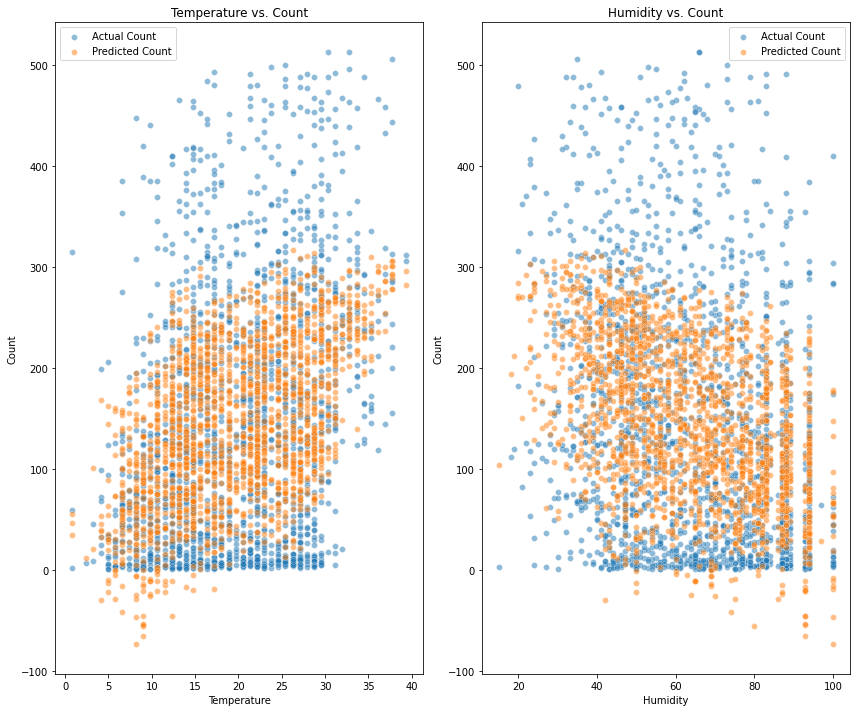

In [41]:
test_results = X_test.copy()
test_results['actual_count'] = y_test
test_results['predicted_count'] = pred

plt.figure(figsize=(12, 10))

# Temperature vs. Count
plt.subplot(1, 2, 1)
sns.scatterplot(data=test_results, x='temp', y='actual_count', label='Actual Count', alpha=0.5)
sns.scatterplot(data=test_results, x='temp', y='predicted_count', label='Predicted Count', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs. Count')
plt.legend()

# Humidity vs. Count
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_results, x='humidity', y='actual_count', label='Actual Count', alpha=0.5)
sns.scatterplot(data=test_results, x='humidity', y='predicted_count', label='Predicted Count', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs. Count')
plt.legend()

plt.tight_layout()
plt.show()